# The Sparks Foundation - Internship
### Data Science and Business Analytics

## Sidharth S N

Task 4: Explore the Global Terrorism dataset and try to findout hot zones of terrorism

***

Importing all the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***

Getting the dataset

In [2]:
data = pd.read_csv('globalterrorism.csv', encoding = 'latin')

C:\Users\91968\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()                 # Viewing the first 5 elements of dataset

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


***

Visualization of data according to year

In [5]:
year = data['iyear'].unique()     
attack_count = data['iyear'].value_counts()

Text(0, 0.5, 'Attack count')

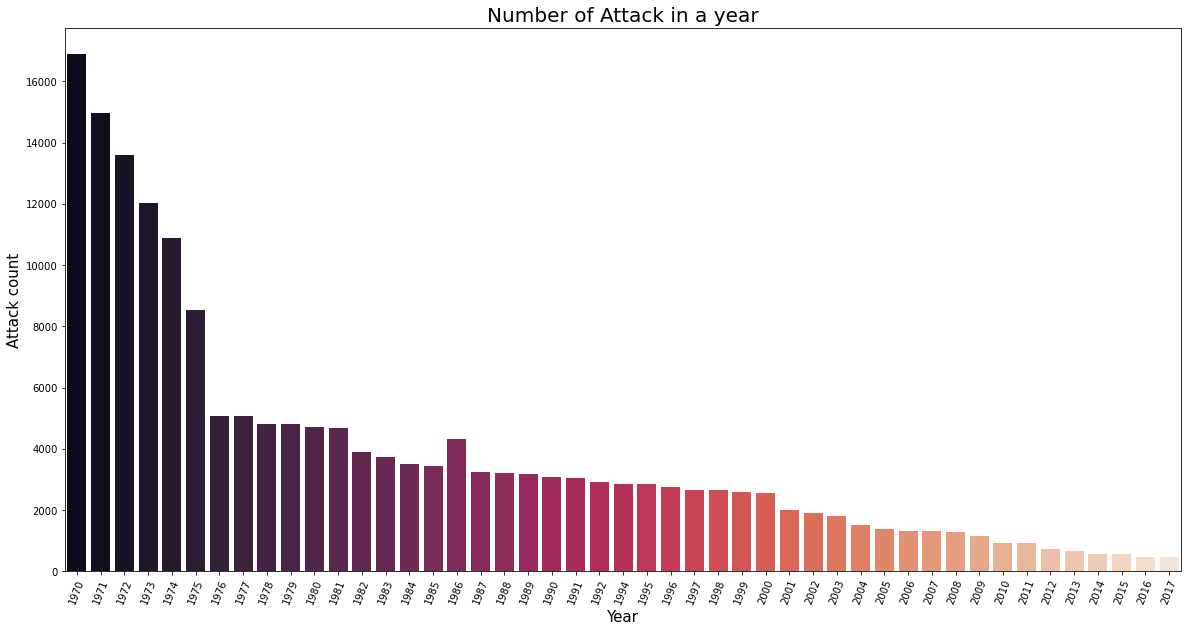

In [6]:
plt.figure(figsize=(20,10))
sns.barplot(x = year, y = attack_count, palette = 'rocket')
plt.xticks(rotation = 69)
plt.title('Number of Attack in a year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Attack count', fontsize=15)

From the above plot we can see the number of attacks are reducing 

Visualization of data according to region

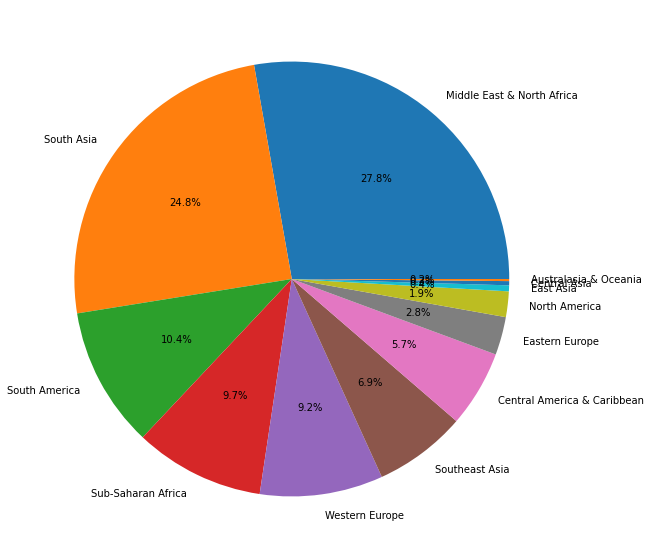

In [7]:
# Using Pie chart
plt.figure(figsize=(12,10))
plt.pie(data['region_txt'].value_counts(), labels = data['region_txt'].value_counts().index, autopct='%1.1f%%')
plt.show()

Text(0, 0.5, 'Number of attacks')

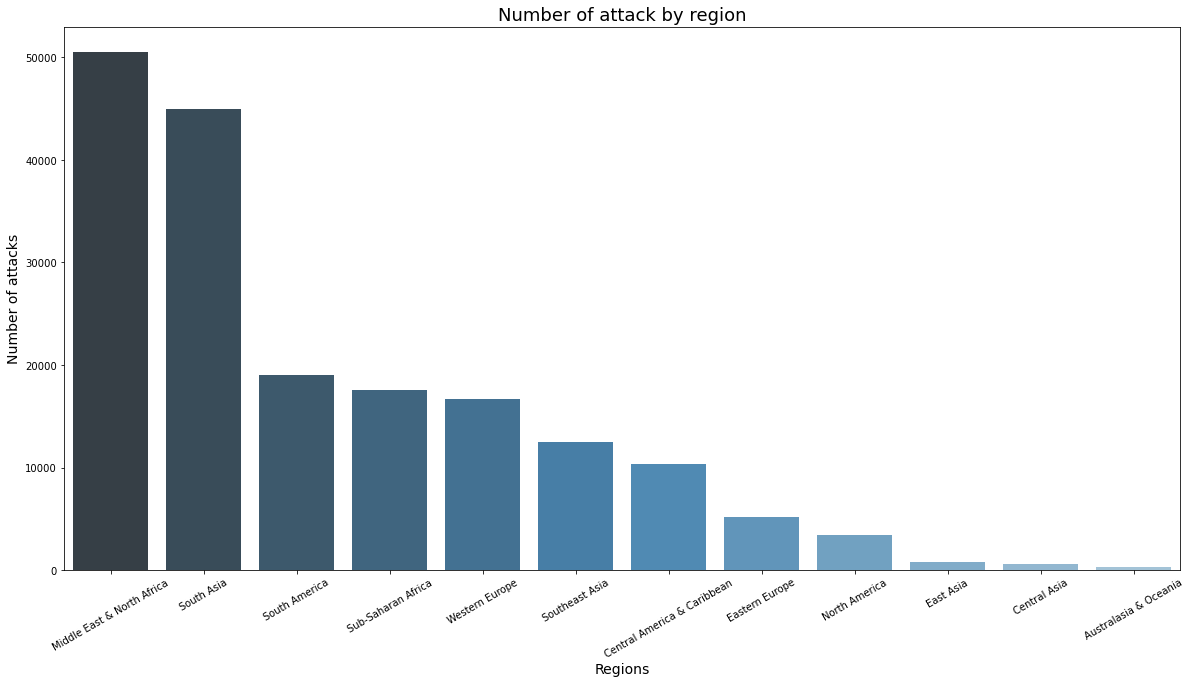

In [8]:
# Using Bar graph
plt.figure(figsize=(20,10))
sns.barplot(x = data['region_txt'].value_counts().index, y = data['region_txt'].value_counts(), palette = 'Blues_d')
plt.title('Number of attack by region', fontsize = 18)
plt.xlabel('Regions', fontsize = 14)
plt.xticks(rotation = 30)
plt.ylabel('Number of attacks', fontsize = 14)

 From the above plots we can see that the 2 regions have the most attacks i.e 'Middle East & North Africa' and 'South Asia'

Visualization of data according to Country

In [9]:
# Looking at top 40 countries
attack = data['country_txt'].value_counts().sort_values(ascending=False)[:40]

Text(0.5, 1.0, 'Number of attack by Countries')

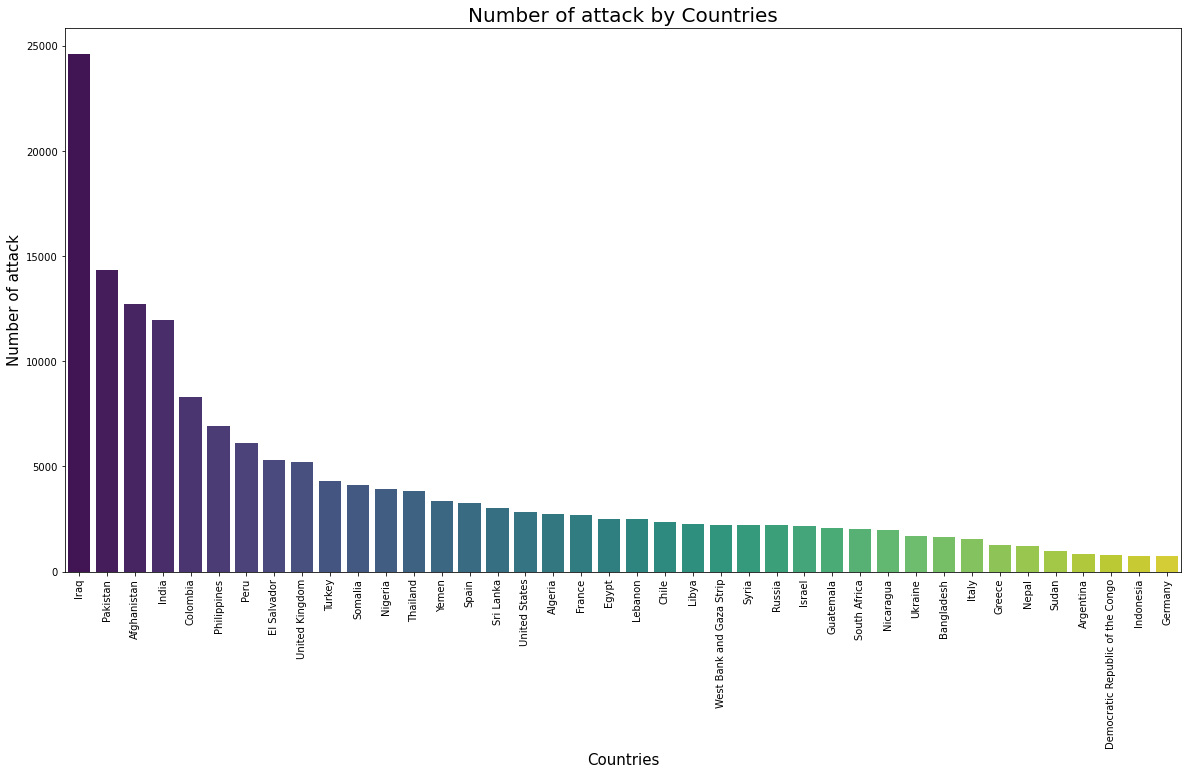

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x = attack.index, y = attack, palette = 'viridis')
plt.xticks(rotation = 90)
plt.xlabel("Countries", fontsize = 15)
plt.ylabel('Number of attack', fontsize = 15)
plt.title('Number of attack by Countries', fontsize = 20)

From the above plot we can tell that the Iraq has the most attacks of all time.

Number of people died in all these attacks

In [11]:
# In Years
kill = data['nkill'].groupby(data['iyear']).sum()

Text(0.5, 1.0, 'Deaths in year')

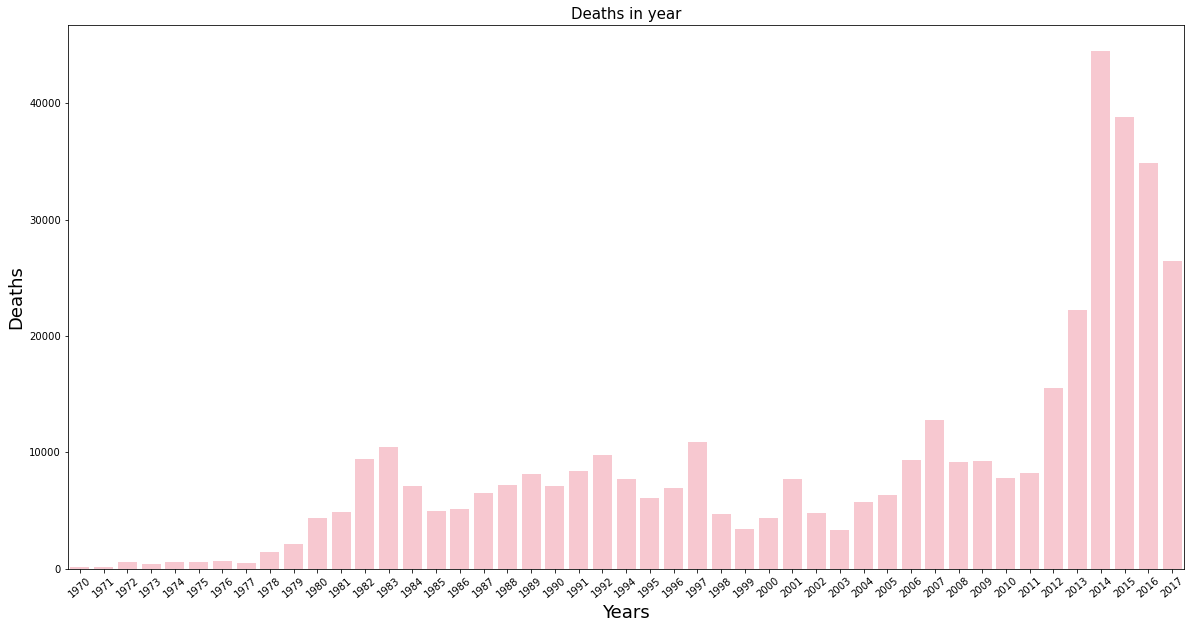

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(x = year, y = kill, color = 'pink')
plt.xticks(rotation = 40)
plt.xlabel('Years', fontsize = 18)
plt.ylabel('Deaths', fontsize = 18)
plt.title('Deaths in year', fontsize = 15)

In [13]:
# In Regions
kil = data['nkill'].groupby(data['region_txt']).sum()

Text(0.5, 1.0, 'Deaths in region')

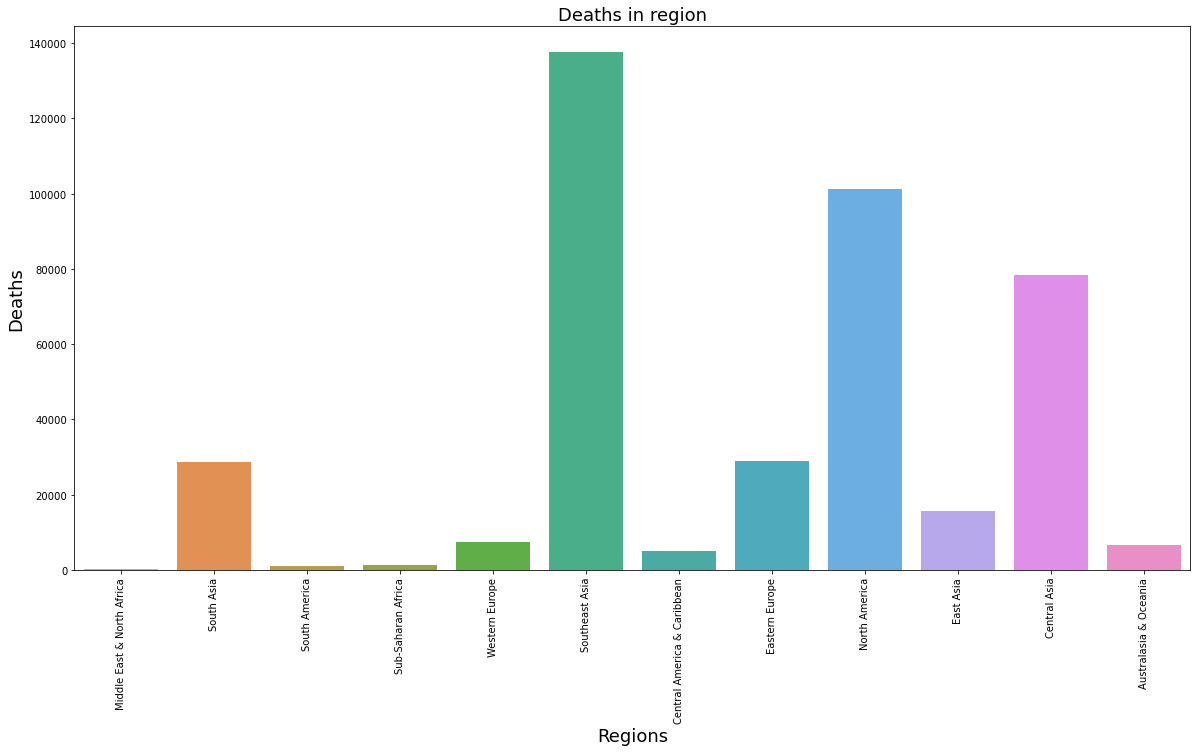

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(x = data['region_txt'].value_counts().index, y = kil )
plt.xticks(rotation = 90)
plt.xlabel('Regions', fontsize = 18)
plt.ylabel('Deaths', fontsize = 18)
plt.title('Deaths in region', fontsize = 18)

From the above plot we can say that 'Southeast Asia' is the most effected Region followed by 'North America' and 'Central Asia'.

In [15]:
# In Cities
# Let's look at top 20 most effected cities
kills = data['nkill'].groupby(data['city']).sum().sort_values(ascending=False)[:20]

Text(0.5, 1.0, 'Deaths in cities')

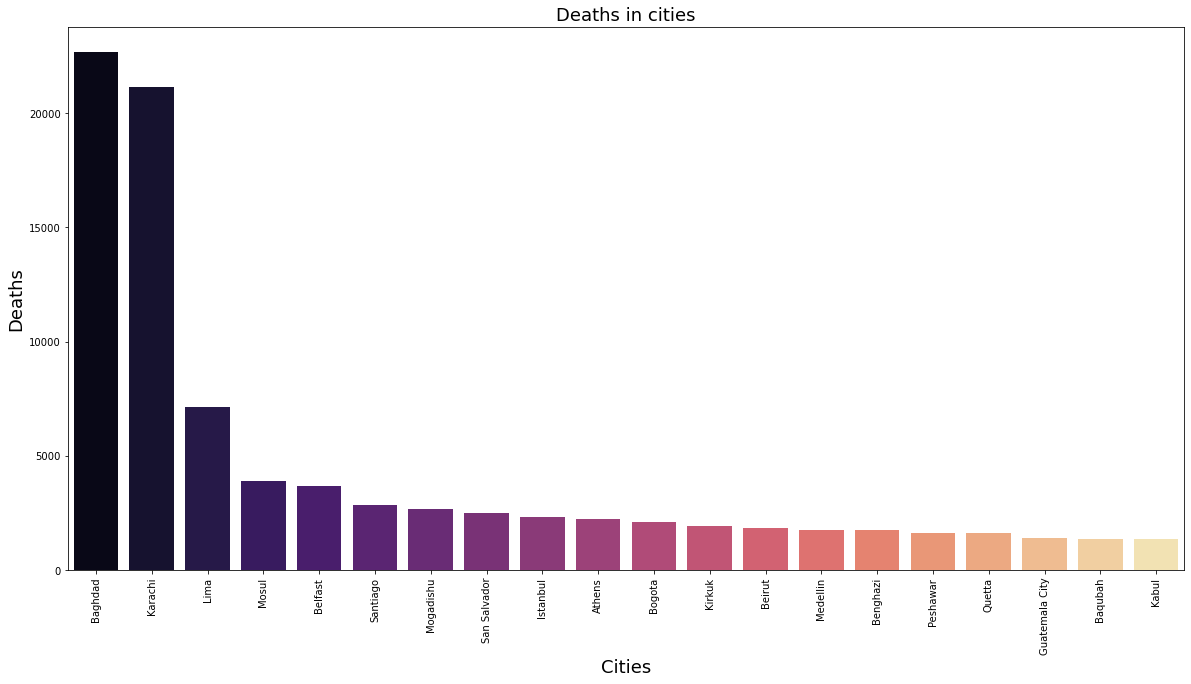

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x = data['city'].value_counts().drop('Unknown')[:20].index, y = kills, palette = 'magma')
plt.xticks(rotation = 90)
plt.xlabel('Cities', fontsize = 18)
plt.ylabel('Deaths', fontsize = 18)
plt.title('Deaths in cities', fontsize = 18)

From the above plot we can say that 'Baghdad' city has the most number of deaths

Let's see total number of casualities in cities

In [17]:
# Top 10 cities
data['casualities'] = data['nkill'] + data['nwound']
ki = data['casualities'].groupby(data['city']).sum().sort_values(ascending=False)[:10]

Text(0, 0.5, 'Casualities')

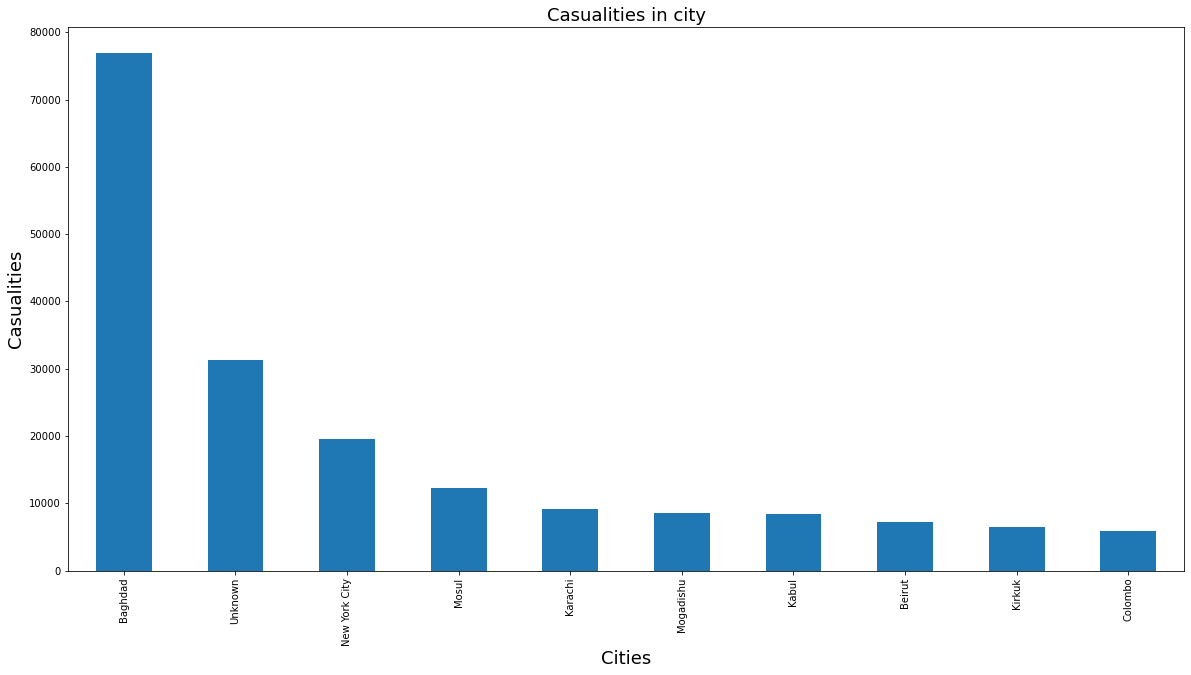

In [18]:
ki.plot(kind='bar',figsize = (20,10))
plt.title('Casualities in city', fontsize = 18)
plt.xlabel('Cities', fontsize = 18)
plt.ylabel('Casualities', fontsize = 18)

From the above plot we can say that 'Baghdad' has the most number of casualities

Types of Attacks

In [19]:
# Attack type
attack_type = data['attacktype1_txt'].value_counts()

Text(0, 0.5, 'Number of attacks')

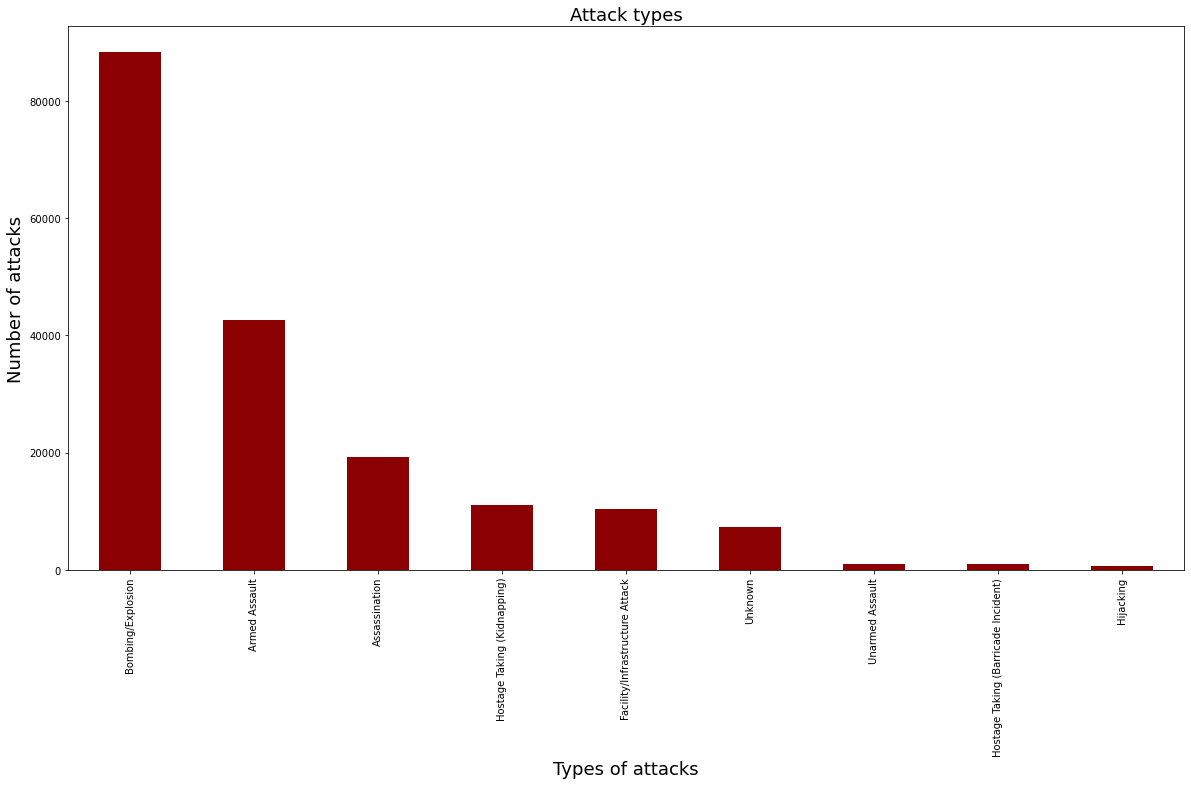

In [20]:
attack_type.plot(kind = 'bar', figsize = (20,10), color = 'darkred')
plt.title('Attack types', fontsize = 18)
plt.xlabel('Types of attacks', fontsize = 18)
plt.ylabel('Number of attacks', fontsize = 18)

We can see that Bombing/Explosion attacks are the most 

People killed in various types of attack

In [21]:
# Deaths in varios attacks
k = data['nkill'].groupby(data['attacktype1_txt']).sum()

Text(0, 0.5, 'Number of deaths')

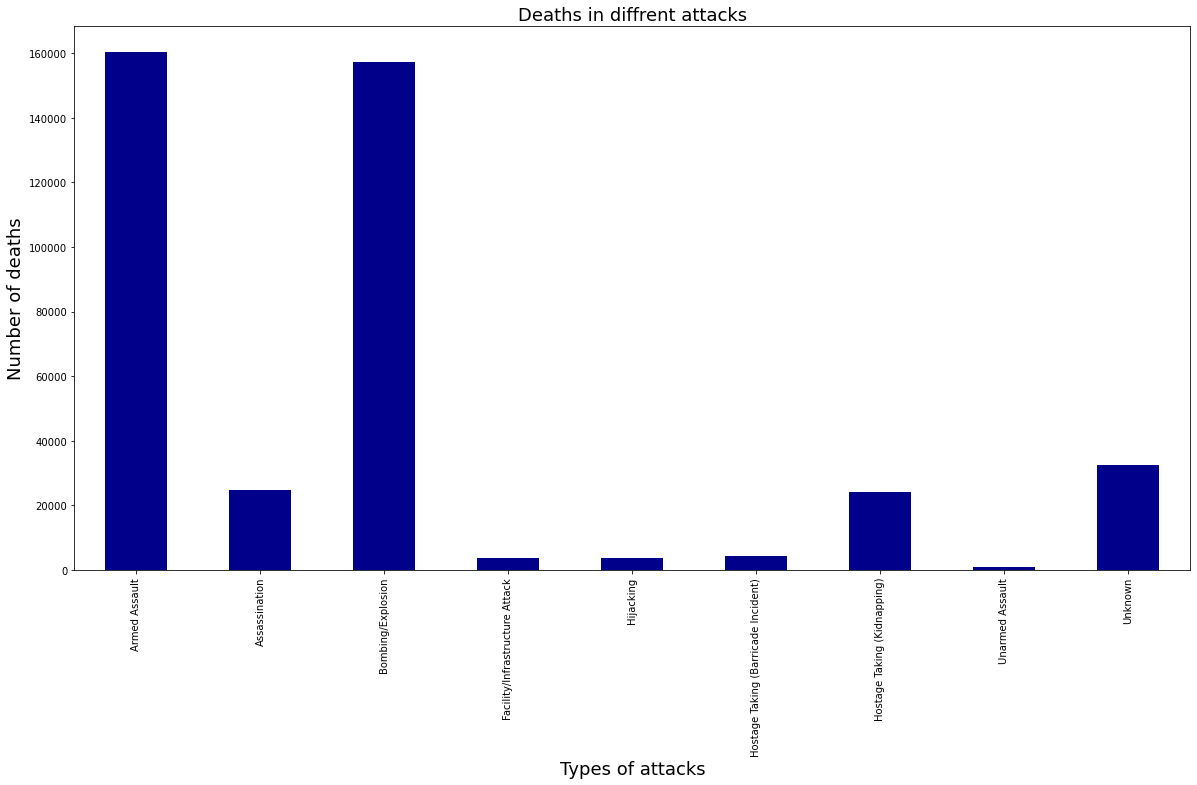

In [22]:
k.plot(kind = 'bar', figsize = (20,10), color = 'darkblue')
plt.title('Deaths in diffrent attacks', fontsize = 18)
plt.xlabel('Types of attacks', fontsize = 18)
plt.ylabel('Number of deaths', fontsize = 18)

We can see that Armed Assault and Bombing/Explosion attacks has the most number of deaths

Finding the attack Targets

In [23]:
# Attack targets
target = data['targtype1_txt'].value_counts()

Text(0, 0.5, 'Counts')

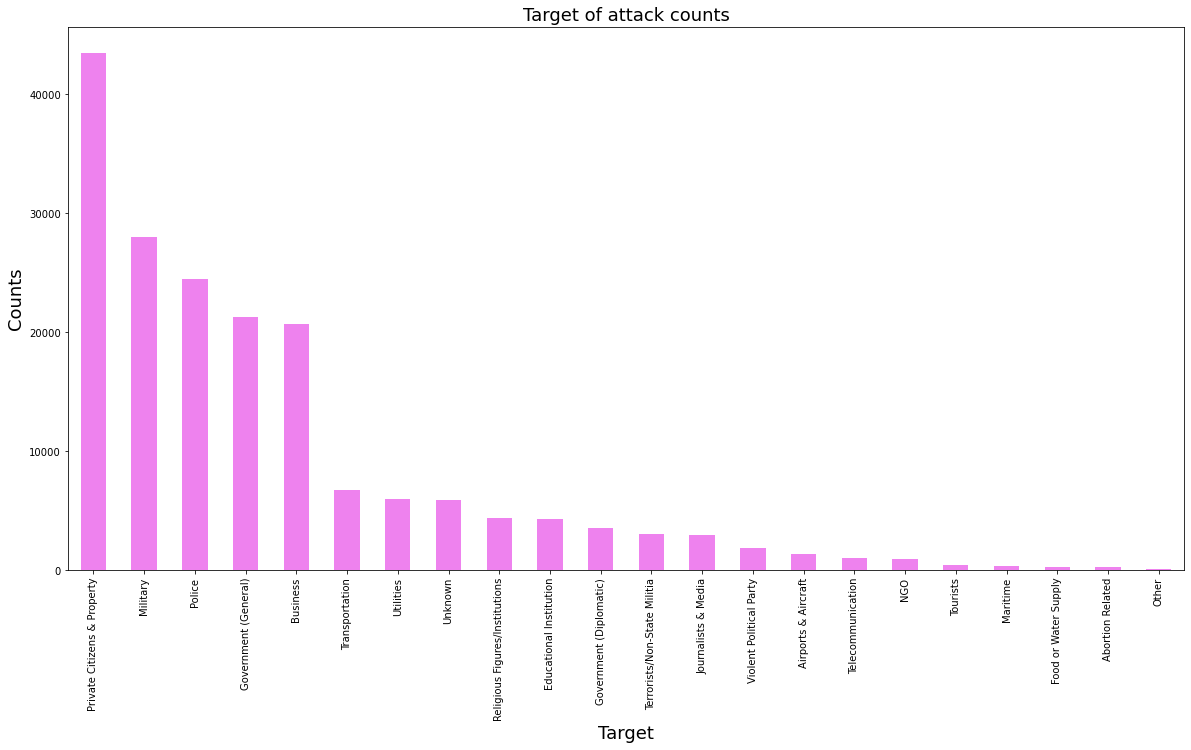

In [24]:
target.plot(kind = 'bar', figsize = (20,10), color = 'violet')
plt.title('Target of attack counts', fontsize = 18)
plt.xlabel('Target', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)

From the above plot we can say that one of the major target of attacks are Private property & Citizens

Diffrent Weapons used for attacks

In [25]:
# Weapons for attack
wep = data['weaptype1_txt'].value_counts()

Text(0, 0.5, 'Counts')

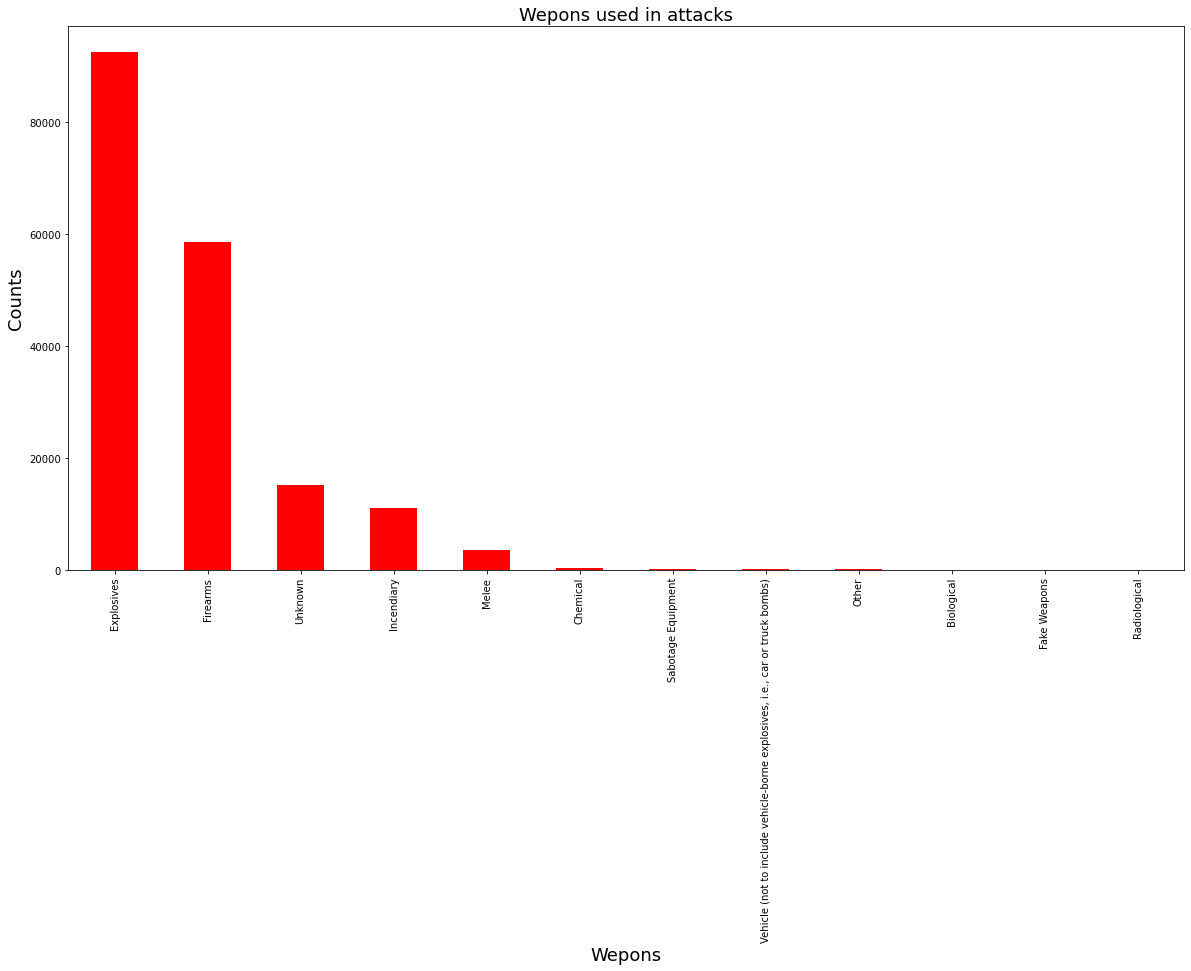

In [26]:
wep.plot(kind = 'bar', figsize = (20,10), color = 'red')
plt.title('Wepons used in attacks', fontsize = 18)
plt.xlabel('Wepons', fontsize = 18)
plt.ylabel('Counts', fontsize = 18)

We can clearly say that most used weapon is Explosives

Top 10 Terrorist groups attacks

In [27]:
# Terrorist groups
group_name = data['gname'].value_counts().drop('Unknown').sort_values(ascending = False).head(10)

Text(0, 0.5, 'People killed')

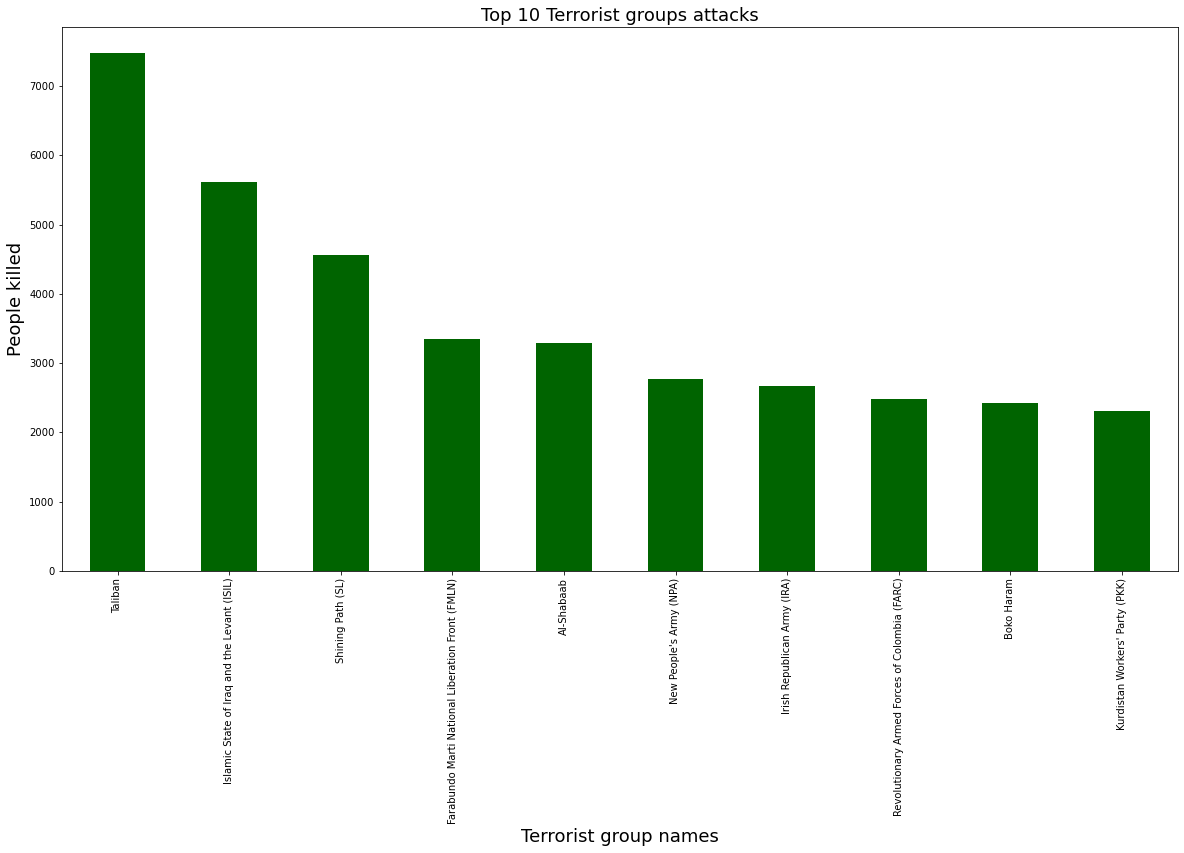

In [28]:
group_name.plot(kind = 'bar', figsize = (20,10), color = 'darkgreen')
plt.title('Top 10 Terrorist groups attacks', fontsize = 18)
plt.xlabel('Terrorist group names', fontsize = 18)
plt.ylabel('People killed', fontsize = 18)

We can see that Taliban Terrorist group has killed most number of people.

***

## Conclusion:

Hot Zones of Terrorism are:

1. Most Attacked Year: 1970 

2. Most Attacked Region: 'Middle East & North Africa' followed by 'South Asia' 

3. Most Attacked Country: Iraq


4. Year with highest deaths: 2014

5. Region with highest deaths: Southeast Asia

6. City with highest deaths and casualities: Baghdad


7. Most Attack types: Bombing/Explosion

8. Most Attack targets: Private property & Citizens

9. Most Popular weapon used for attacks: Explosion


10. Terrorist group with most attacks and kills: Taliban

***

Thank You:(